<h3>Importamos las bibliotecas</h3>
<p>
    <ol>
        <li>Pandas</li>
        <li>Numpy</li>
    <ol/>
</p>

In [79]:
import pandas as pd
import numpy as np

<h3>Importamos nuestro Dataset</h3>
<p>
    <ol>
        <li>adult.data</li>
    <ol/>
</p>

In [80]:
df=pd.read_csv("./Sets/adult.data.csv")

In [81]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [82]:
#Verificamos la integridad de los datos
df.count()


age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
salary            32561
dtype: int64

In [83]:
#Observamos información acerca del número de columnas, filas y tipos de datos en nuestro Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [84]:
#Filtarmos un conteo de registros por Raza.
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [85]:
#Calculamos el procentaje la edad promedio de los hombres.
round(df[df["sex"]=="Male"]["age"].mean(),1)


39.4

In [86]:
#Calculamos el porcentaje de las personas que tienen Licenciatura.
(df["education"].value_counts(normalize=True)*100).loc["Bachelors"].round(1)


16.4

<AxesSubplot:>

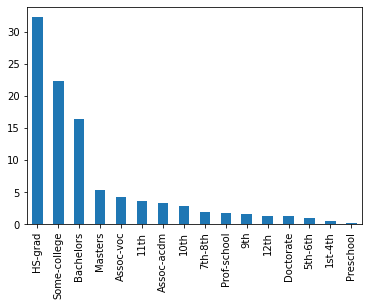

In [87]:
#Graficamos el porcentaje de la población agrupada por nivel de estudios. 
(df["education"].value_counts(normalize=True)*100).plot.bar()

In [88]:
#Exploramos el número de horas trabajadas por semana.
df["hours-per-week"].sort_values(ascending=True)

19750     1
25078     1
11451     1
8447      1
32525     1
         ..
25806    99
30610    99
10143    99
4308     99
1887     99
Name: hours-per-week, Length: 32561, dtype: int64

In [89]:
#Obtenemos el número mínimo de horas que un trabajador labora por semana.
df["hours-per-week"].min()

1

In [90]:
#filtramos los datos para saber que registros tienen educación superior y cuales no.
higher_education = df[df['education'].isin(['Masters', 'Doctorate',"Bachelors"])]    
lower_education = df[~df['education'].isin(['Masters', 'Doctorate',"Bachelors"])]

In [91]:
higher_education

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [92]:
lower_education

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [93]:
# ¿Qué porcentaje de personas con educación avanzada ("Licenciatura", "Maestría" o "Doctorado") gana más de 50 mil?
# ¿Qué porcentaje de personas sin educación avanzada gana más de 50K?
len_rich_higher_50=len(higher_education[higher_education["salary"]==">50K"])

len_rich_lower_50=len(lower_education[lower_education["salary"]==">50K"])

higher_education_rich = round((len_rich_higher_50*100)/len(higher_education),1)

lower_education_rich = round((len_rich_lower_50*100)/len(lower_education),1)

In [94]:
higher_education_rich 

46.5

In [95]:
lower_education_rich

17.4

In [96]:
#Filtramos los datos que representan el pircentaje de los que ganan arriba de >50K y trabajan 1 hora por semana.
minimum_hours_greater_50=df[(df["hours-per-week"]==1) & (df["salary"].isin([">50K"]))]
minimum_hours_greater_50

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,?,76043,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K


In [97]:
#Porcentaje de las personas que trabajan 1 hora por semana y ganan >50K
porcentaje_minimum_hours_greater_50=(2*100)/32561
porcentaje_minimum_hours_greater_50


0.0061423174963913885

In [98]:
#Filtramos la ocupación más popular de las personas que son de la India y ganan >50K 
top_IN_occupation = df[(df["salary"]==">50K") & (df["native-country"]== "India")].loc[:,"occupation"].value_counts().idxmax()
top_IN_occupation

'Prof-specialty'

In [99]:
#Filtramos los datos que representan a las mujeres que cuentan con Maestría
df.loc[(df["education"]=="Masters")&(df["sex"]=="Female")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
102,47,Self-emp-not-inc,149116,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32361,55,Local-gov,166502,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
32473,41,Federal-gov,160467,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,1506,0,40,United-States,<=50K
32504,50,Private,208630,Masters,14,Divorced,Sales,Not-in-family,White,Female,0,0,50,United-States,>50K
32513,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K
